# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Logistica: Lección 1 - EDA**
---

In [1]:
# Tratamiento de los datos
# ========================
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de warnings
# =========================
import warnings
warnings.filterwarnings("ignore")

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.  

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.  

**Objetivos**  
- Buscar un conjunto de datos a analizar   
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.   
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado  
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.  
- Interpretación de los resultados.  

### 1. Elección y apertura del dataset

In [2]:
# cargamos nuestro csv
df = pd.read_csv("datos/invistico_airline.csv", index_col = 0).reset_index()
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


### 2. Selección y exploración de la variable respuesta

Decidimos que la variable respuesta es 'satisfaction', que es categórica y dicotómica (satisfied/dissatisfied).

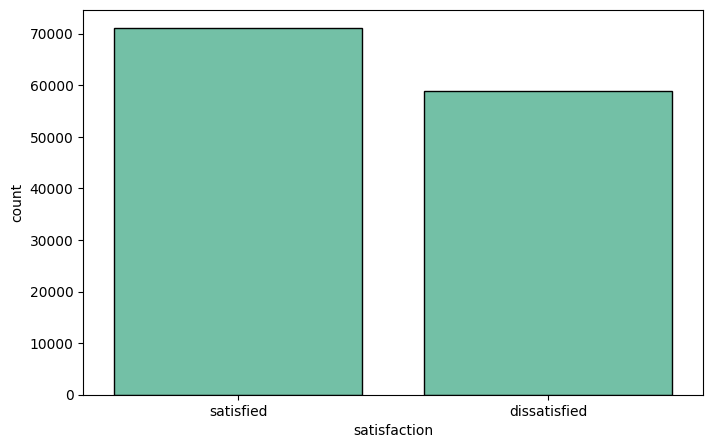

In [3]:
# ploteamos el número de registros de cada categoría de la variable respuesta
plt.figure(figsize=(8,5)) 

sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')

plt.show();

In [4]:
# lo sacamos en porcentaje
df["satisfaction"].value_counts() * 100 / df.shape[0]

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

Como vemos no hay una diferencia excesiva entre el número de datos de los que disponemos para las dos categorías de la variable respuesta. Aunque dadao que tenemos muchos registros en términos absolutos sí hay una diferencia de más de 10000 datos.

### 3. Renombrado de columnas

In [5]:
# hacemos un primer renombrado para sustituir espacios y quitar mayúsculas
nuevas_columnas = {col: col.replace(" ", "_").replace("-", "").replace("/", "_").lower() for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

### 4. Primer análisis exploratorio

In [6]:
# realizamos una exploración inicial utilizando la siguiente función:
spf.explorar_df(df, 'Satisfaccion Aerolinea')

EXPLORACIÓN DEL DATAFRAME SATISFACCION AEROLINEA
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe Satisfaccion Aerolinea son:


,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe Satisfaccion Aerolinea son:


,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe Satisfaccion Aerolinea:


,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
98862,satisfied,Female,Loyal Customer,49,Business travel,Eco Plus,705,4,5,5,5,2,1,1,4,4,4,4,4,4,4,0,0.0
19978,satisfied,Female,Loyal Customer,32,Personal Travel,Eco,2440,1,1,1,1,3,4,5,4,4,5,4,4,4,5,0,6.0
6083,dissatisfied,Male,Loyal Customer,57,Personal Travel,Eco,2034,1,5,1,1,4,1,4,4,3,4,4,4,4,4,28,33.0
30275,satisfied,Female,Loyal Customer,24,Personal Travel,Eco,2301,5,5,5,5,3,1,1,5,5,5,5,3,5,2,18,2.0
108703,satisfied,Female,Loyal Customer,59,Business travel,Business,258,2,1,2,2,3,1,1,4,4,4,4,4,4,5,69,90.0
18027,dissatisfied,Male,Loyal Customer,32,Personal Travel,Eco,1881,2,5,2,3,5,2,5,5,4,5,4,3,5,5,25,14.0
24118,dissatisfied,Male,Loyal Customer,64,Personal Travel,Eco,1516,3,4,0,4,2,0,2,2,4,5,4,2,3,2,0,0.0
58348,satisfied,Male,disloyal Customer,23,Business travel,Business,2215,4,4,3,2,1,3,1,1,5,5,4,4,4,1,6,5.0
52181,dissatisfied,Female,disloyal Customer,11,Business travel,Eco,2136,3,2,4,3,1,4,1,1,1,2,3,4,4,1,22,28.0
112350,satisfied,Male,Loyal Customer,29,Business travel,Business,4114,3,3,3,3,4,5,4,4,5,5,5,4,4,4,0,0.0


---------------------------------------------------------------------------
El dataframe Satisfaccion Aerolinea tiene 129880 filas y 23 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
inflight_wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
inflight_entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
online_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
ease_of_online_booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
gender,129880,2,Female,65899
customer_type,129880,2,Loyal Customer,106100
type_of_travel,129880,2,Business travel,89693
class,129880,3,Business,62160


---------------------------------------------------------------------------
El dataframe Satisfaccion Aerolinea tiene las siguientes columnas: 
Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')
---------------------------------------------------------------------------
El numero de valores distintos de cada columna es:
satisfaction: 2
Los valores únicos de la columna "satisfaction" son: ['satisfied' 'dissatisfied']
gender: 2
Los valores únicos de la columna "gender" son: ['Female' 'Male']
customer_type: 2
Los valores únicos

No tenemos duplicados y tan solo tenemos valores nulos (393 unidades, 0.3%) en la columna 'arrival_delay_in_minutes'.  

Llama la atención que en las columnas de 'departure_delay_in_minutes' y 'arrival_delay_in_minutes' el Q3 sea 12-13 minutos pero el valor máximo llegue a 1584-1592 minutos, por lo que probablemente tendremos outliers.  

Cabe destacar también que tenemos muchas columnas que son datos numéricos pero conceptualmente son categóricas (con valores que van de 0- 5).

### 5. Cambio del tipo de dato para las variables que lo requieren

Como hemos comentado hay muchas columnas numéricas que son en realidad categóricas. Vamos a proceder a cambiar su tipo de dato a tipo object.

In [7]:
# cambiamos el tipo de dato a category
for i in spv.columnas_categoria:
    df[i] = df[i].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   seat_comfort                       129880 non-null  object 
 8   departure_arrival_time_convenient  129880 non-null  object 
 9   food_and_drink                     129880 non-null  object 
 10  gate_location                      129880 non-null  object 
 11  inflight_wifi_service              1298

### 6. Análisis de las variables categóricas

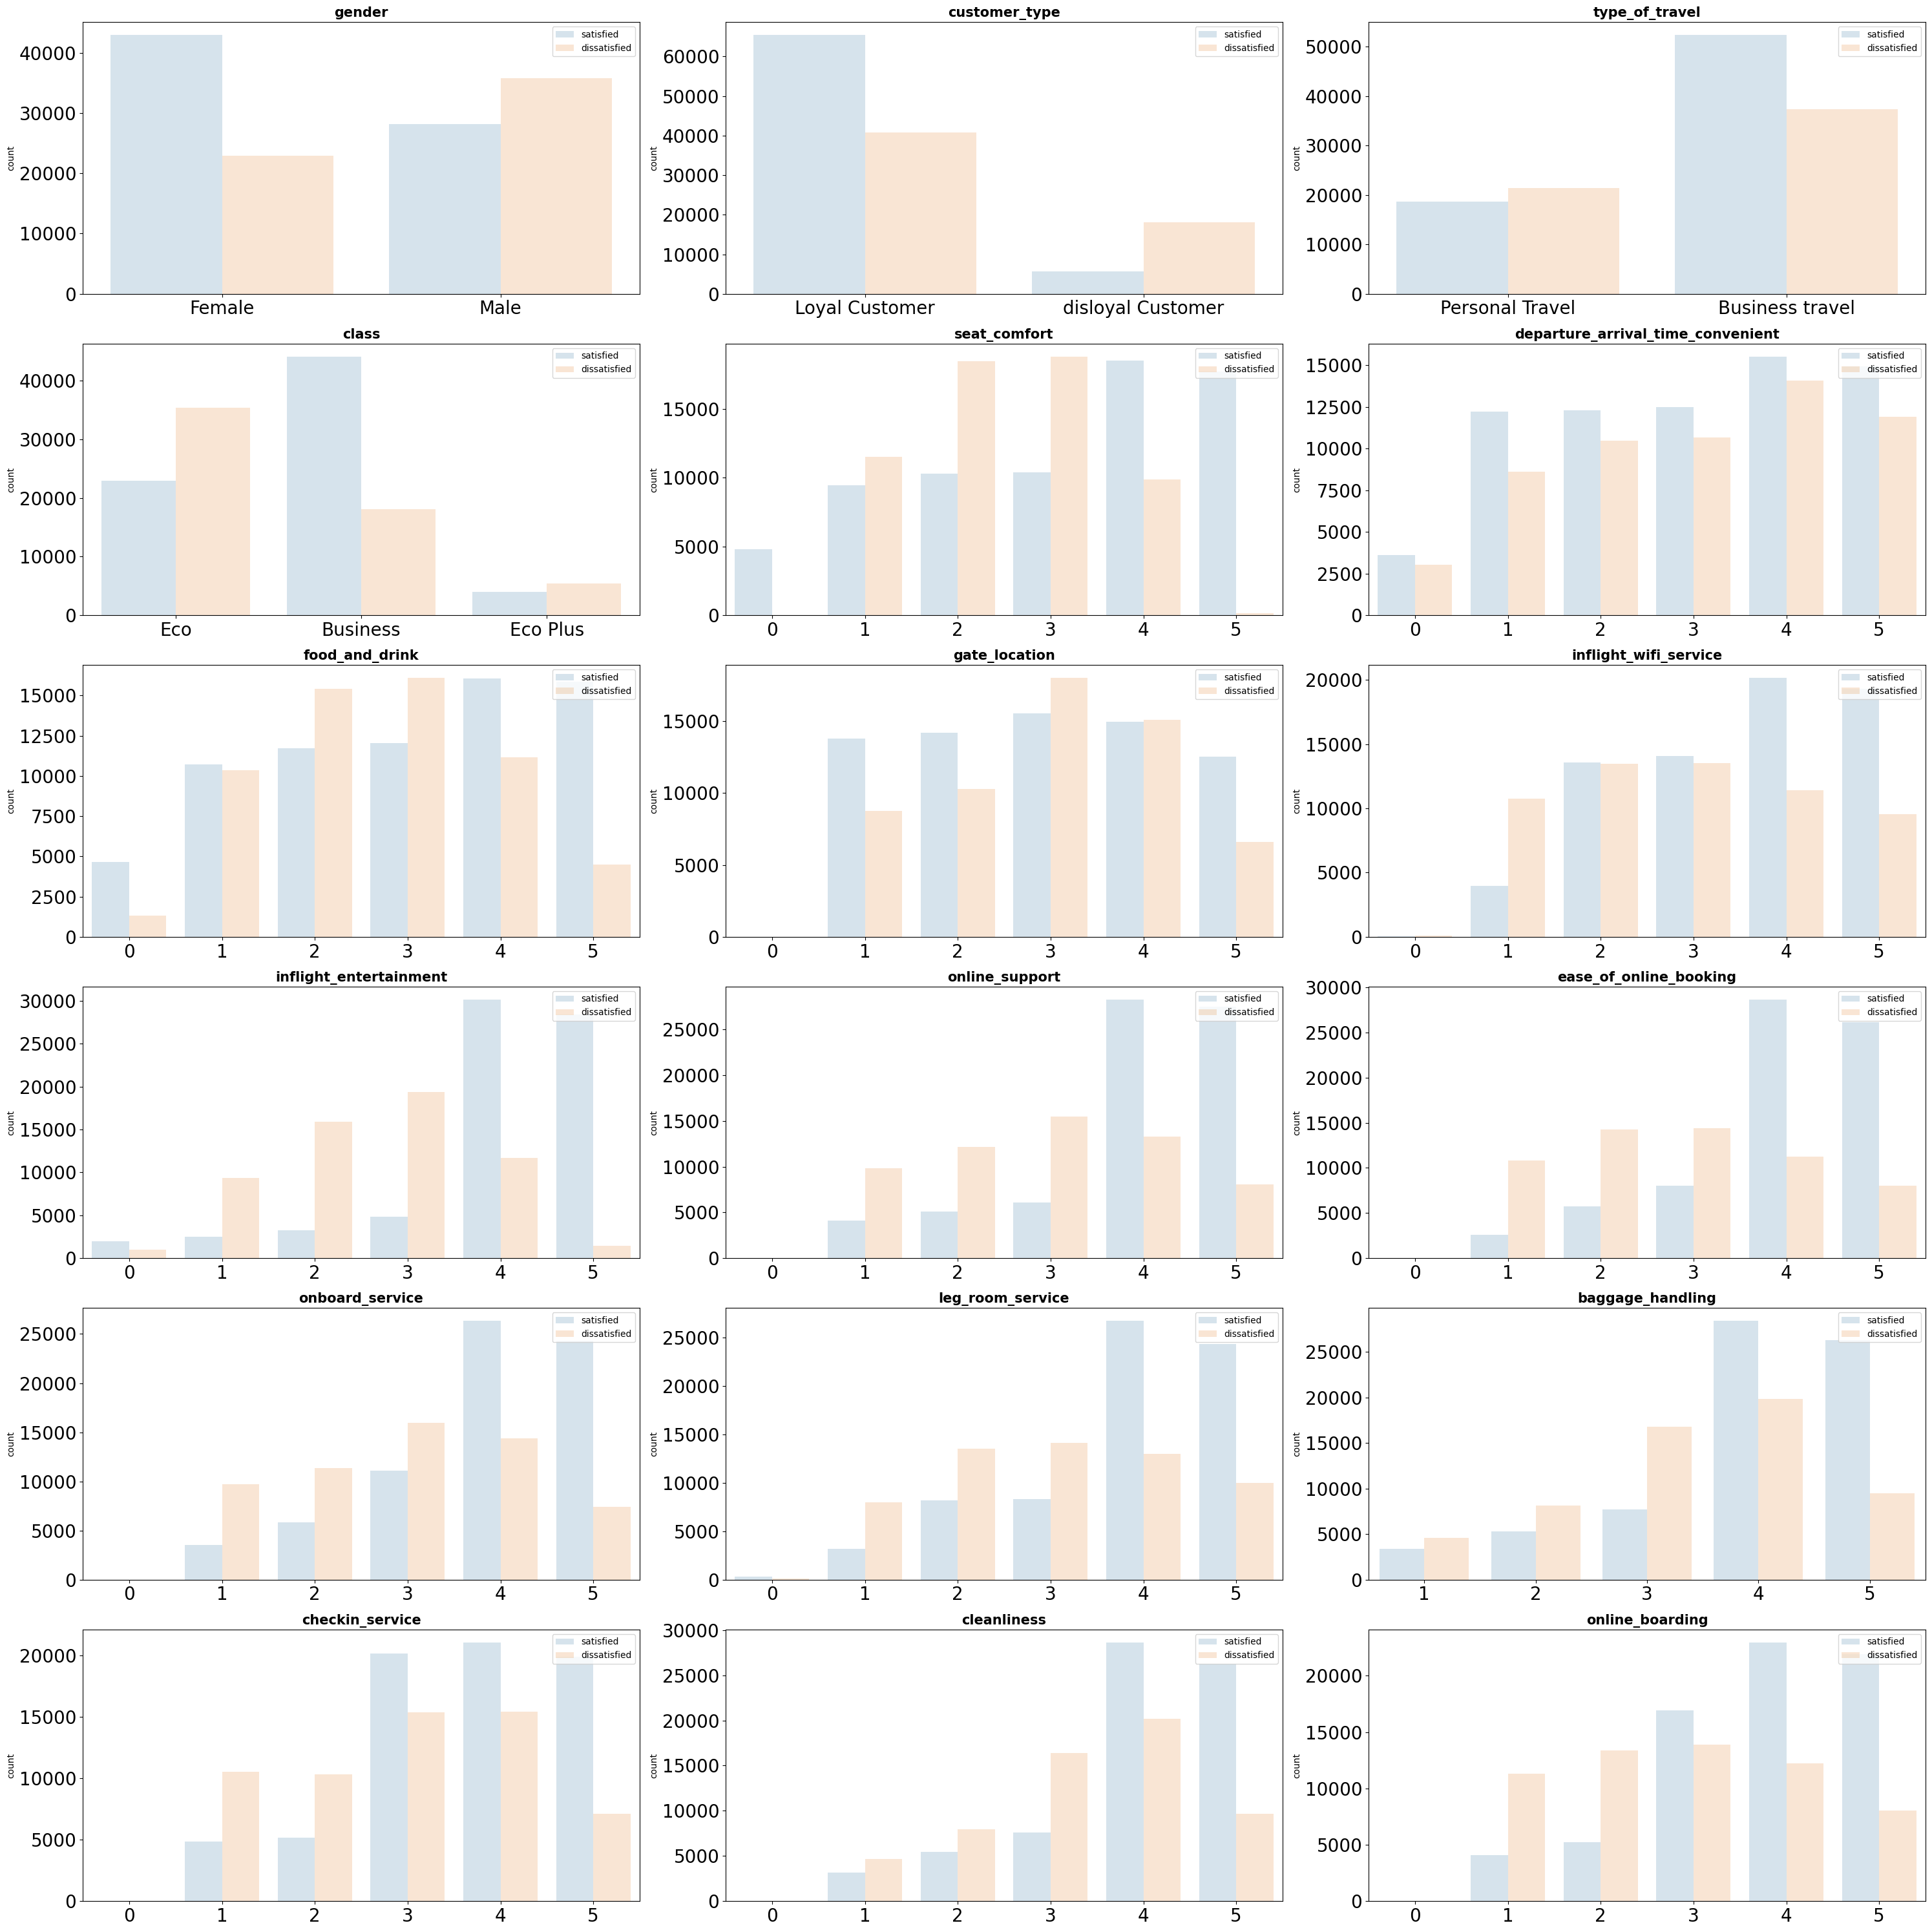

In [8]:
# Distribución para cada variable categórica

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 30))

axes = axes.flat
categoricas = df.select_dtypes(include = "object")
predictoras_cat = categoricas.drop(columns="satisfaction")

for i, colum in enumerate(predictoras_cat.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Graficamente podemos observar que en algunas columnas los datos están distribuidos de forma muy parecida, como por ejemplo 'online_support', 'ease_of_online_booking', 'onboard_service' y 'leg_room_service'. Podría valorarse quitar alguna de ellas pero dado que son parecidas pero no iguales dicidimos seguir adelante con todas para ver cómo afectan al modelo de machine learning.

### 7. Análisis de las variables numéricas

In [9]:
# obtenemos el dataframe de numéricas
df_num = df.select_dtypes(include=np.number)
df_num.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0.0
1,47,2464,310,305.0
2,15,2138,0,0.0
3,60,623,0,0.0
4,70,354,0,0.0


In [10]:
df.arrival_delay_in_minutes.value_counts()[:4]

0.0    72753
1.0     2747
2.0     2587
3.0     2442
4.0     2373
Name: arrival_delay_in_minutes, dtype: int64

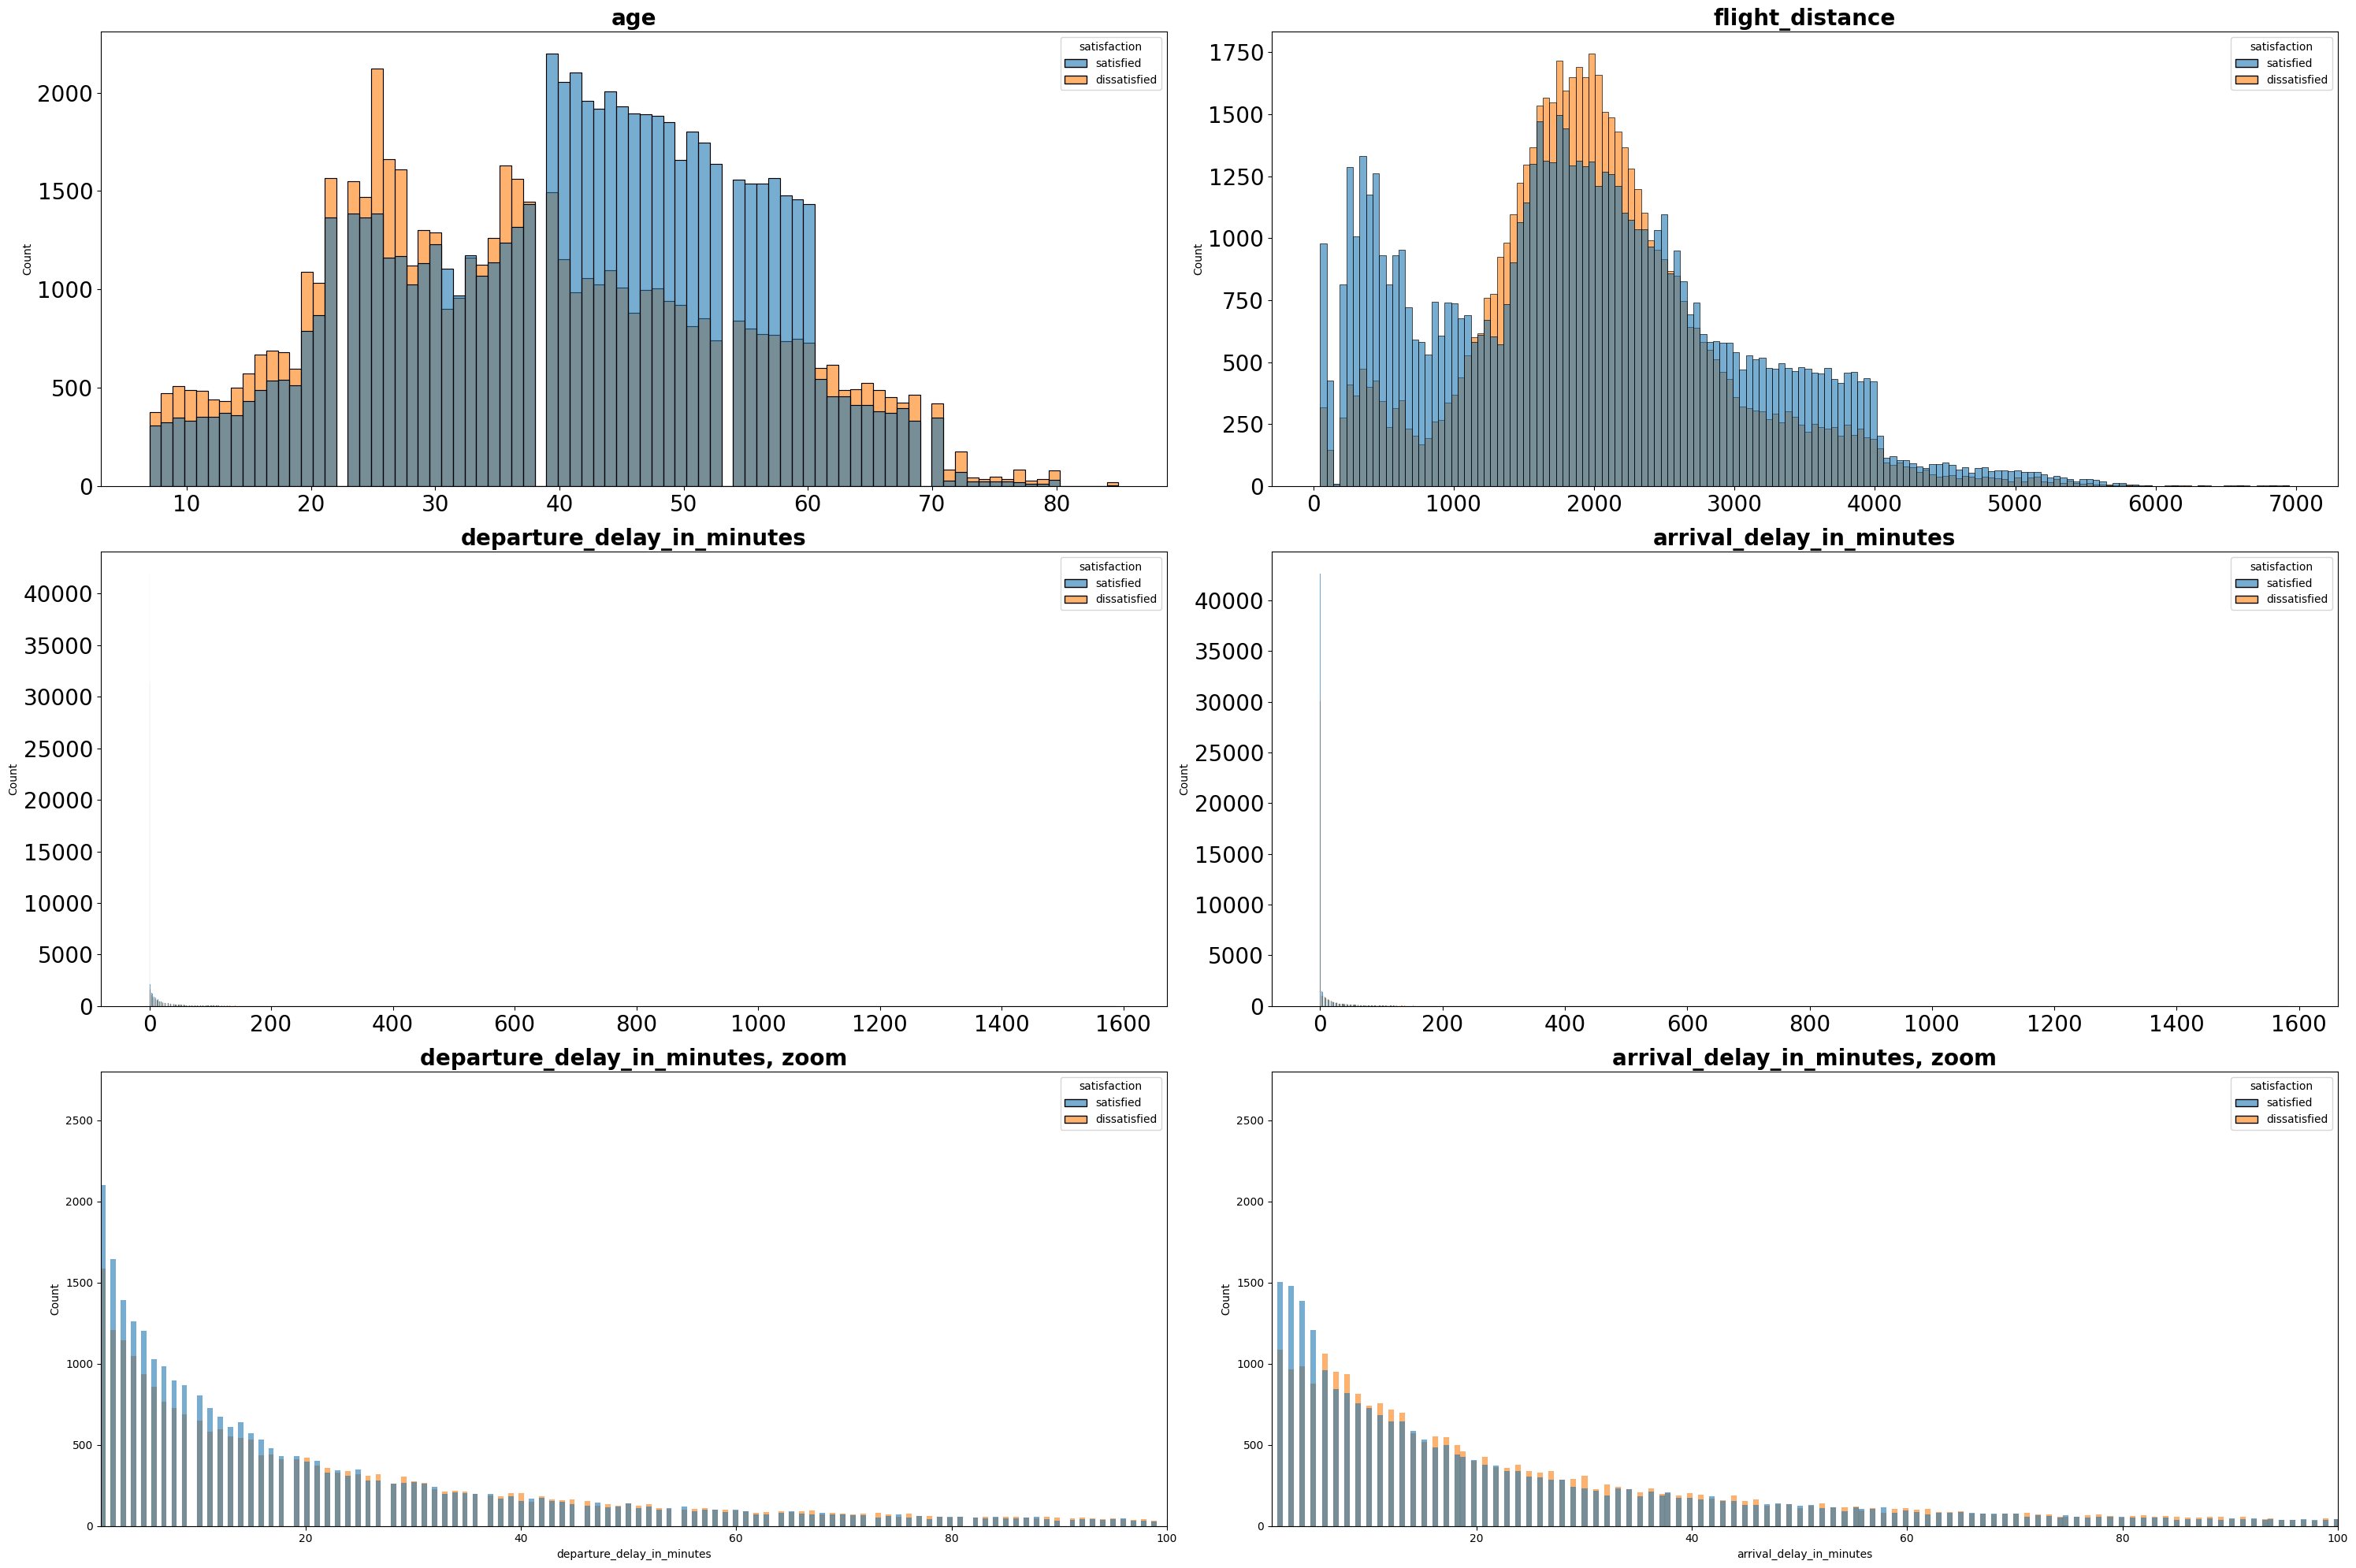

In [11]:
# Vemos la distribución para cada variable numérica
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 20))

axes = axes.flat

for i, colum in enumerate(df_num.columns): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.6, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

# añadimos dos gráficas con un zoom para ver las dos variables que tienen valores demasiado dispersos para visualizarlos de una sola vez
sns.histplot(
        data = df,
        x = 'departure_delay_in_minutes',
        hue = "satisfaction", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.6, 
        ax = axes[4])
axes[4].set_title('departure_delay_in_minutes, zoom', fontsize = 20, fontweight = "bold")
axes[4].set_xlim(1, 100) 
axes[4].set_ylim(0, 2800) 

sns.histplot(
        data = df,
        x = 'arrival_delay_in_minutes',
        hue = "satisfaction", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.6, 
        ax = axes[5])
axes[5].set_title('arrival_delay_in_minutes, zoom', fontsize = 20, fontweight = "bold")
axes[5].set_xlim(1, 100) 
axes[5].set_ylim(0, 2800) 

fig.tight_layout();

Los gráficos que obtenemos encajan con lo que habíamos visto en la exploración numérica. En las variables 'departure_delay_in_minutes' y 'arrival_delay_in_minutes' la mayoría de nuestros datos están en valores muy bajos (vimos que el Q3 es 12-13 minutos) aunque llegamos a tener valores muy altos de hasta 1584-1592 minutos de retraso. Hacemos una visualización en zoom de la zona intermedia de retrasos de 1-100 minutos (ni en el valor más frecuente que es 0, ni la larga cola que llega hasta valores de 1584-1592 minutos).

In [12]:
correlacion = df_num.corr()
correlacion

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
age,1.000000,-0.249625,-0.009041,-0.011248
flight_distance,-0.249625,1.000000,0.112555,0.110103
departure_delay_in_minutes,-0.009041,0.112555,1.000000,0.965291
arrival_delay_in_minutes,-0.011248,0.110103,0.965291,1.000000


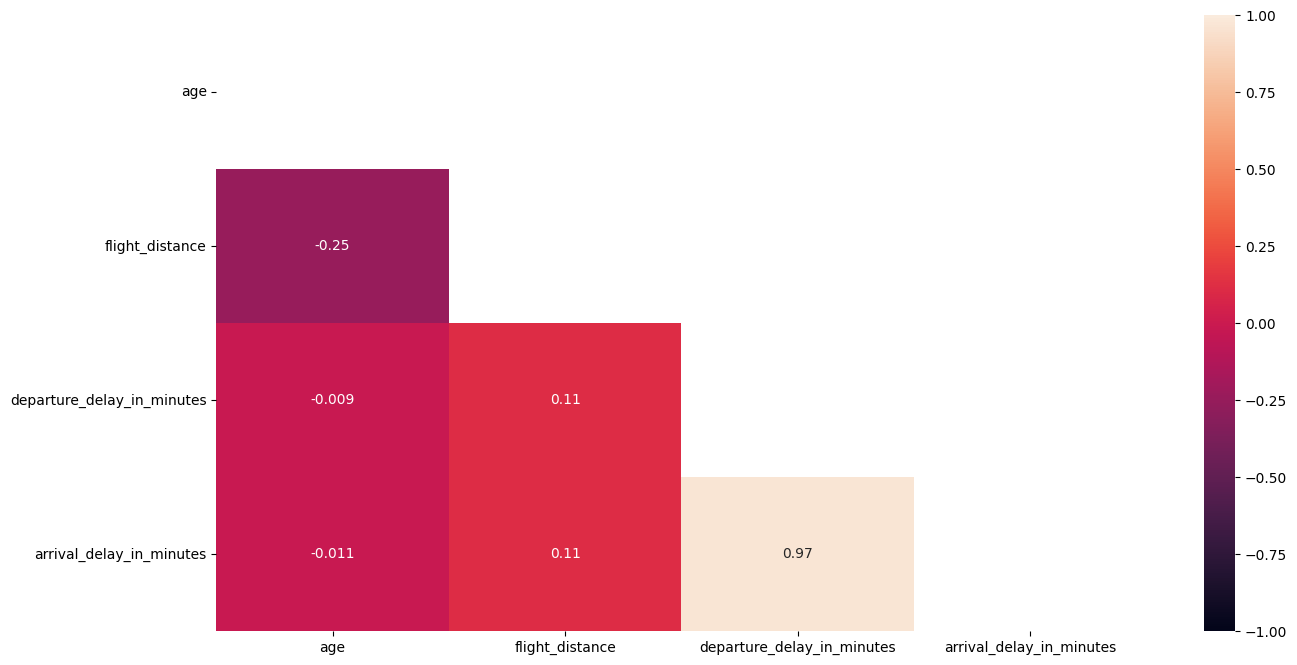

In [13]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, annot = True, mask = mask, vmin=-1, vmax=1);

Como son prácticamente iguales (correlación 0,97) decidimos eliminar una de las columnas que indican los minutos de retraso. Dado que los únicos valores nulos que tenemos están en la columna 'arrival_delay_in_minutes' decidimos eliminar ésta y mantener 'departure_delay_in_minutes'.

In [14]:
# creamos un dataframe con las numéricas y la variable respuesta para no meter todo el df al pairplot
df_pairplot = pd.concat([df_num, df['satisfaction']], axis=1)
df_pairplot.sample()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
50596,26,1327,0,0.0,dissatisfied


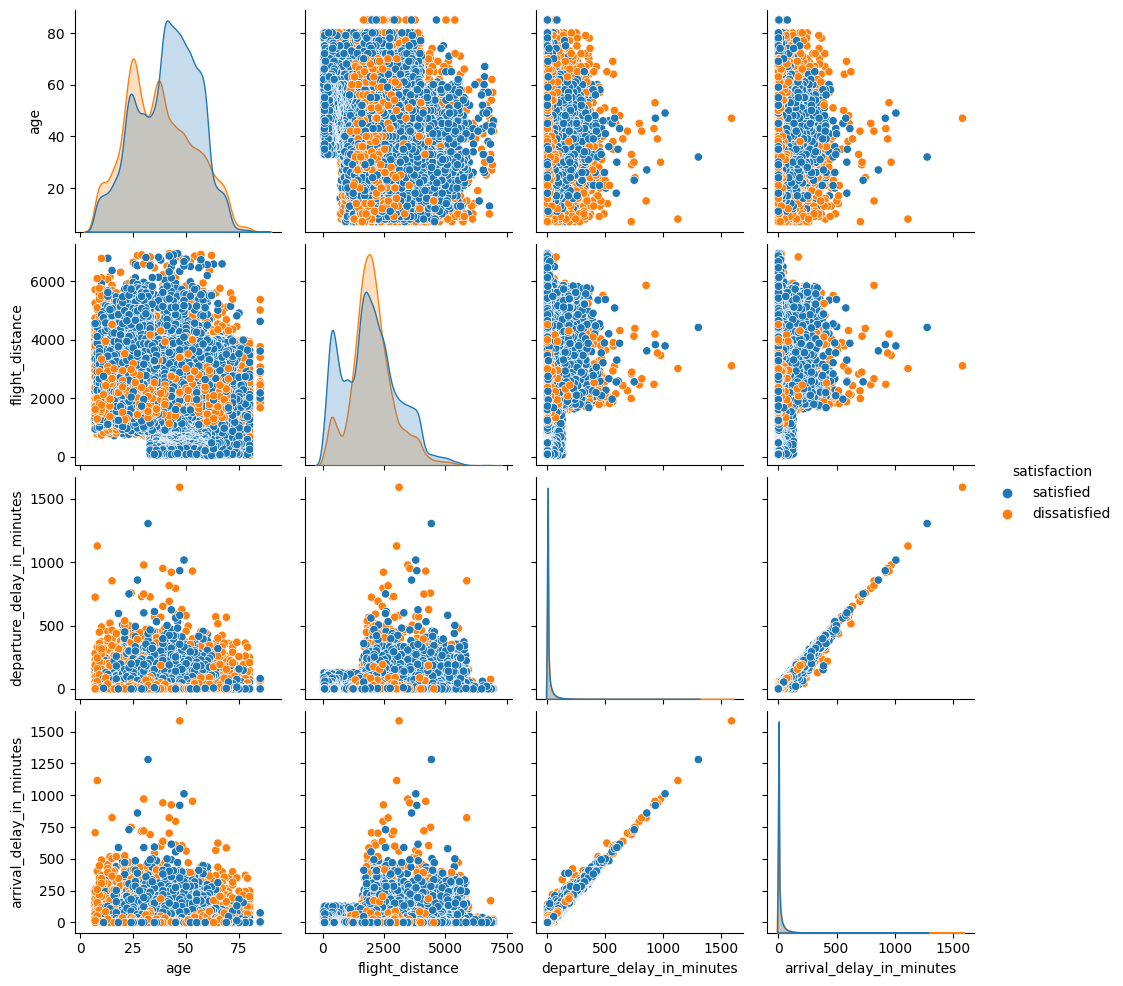

In [15]:
sns.pairplot(df_pairplot, hue='satisfaction');

Vemos que hay una relación directa y lineal muy clara entre el retraso en la salida y en la llegada.  Además, se ve que la mayoría de los registros se acumulan en la zona sin retrasos o de retrasos cortos.

Entre el resto de variables no se aprecian relaciones.  

Entre la edad y la distancia de vuelo se ve un hueco sin datos que sugiere que aproximadamente por debajo de los 30 años no hay pasajeros que realicen vuelos de corta distancia.

### 8. Gestión de outliers

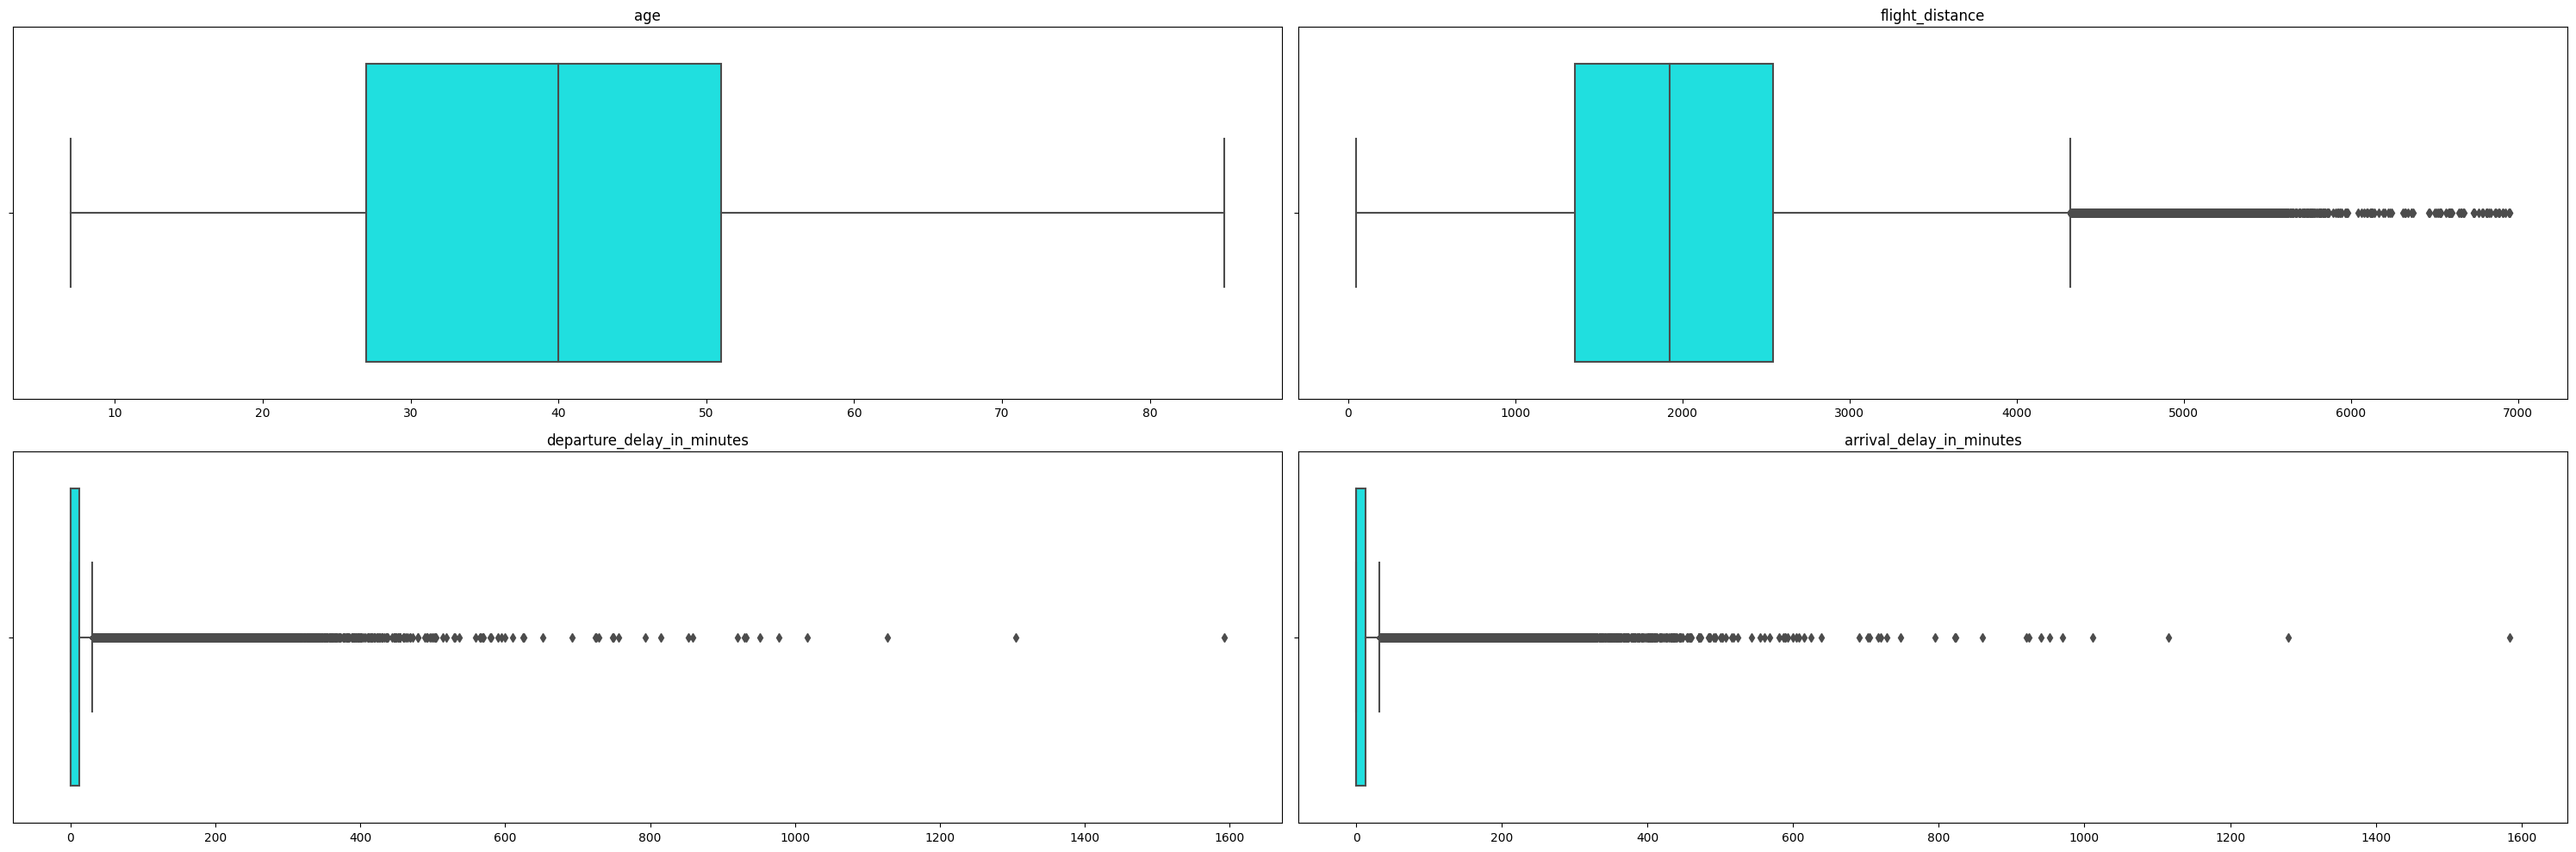

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(30,10))

axes = axes.flat

for indice, num in enumerate(df_num.columns):
    sns.boxplot(x = df[num], data = df, ax=axes[indice], color = "cyan")
    axes[indice].set_title(num)
    axes[indice].set_xlabel("")

fig.tight_layout();

Confirmamos que podemos eliminar la columna 'arrival_delay_in_minutes', cuya distribución de los datos es idéntica a la de 'departure_delay_in_minutes'.

In [17]:
# detectamos cuales son nuestros outliers
df_outliers, indices_outliers = spf.detectar_outliers(df_num.columns, df)

In [18]:
print(f'Tenemos {df_outliers.shape[0]} outliers antes de borrar los duplicados')

Tenemos 20679 outliers antes de borrar los duplicados


In [19]:
# vemos que el dataframe con los outliers tiene duplicados
df_outliers.duplicated().sum()

653

In [20]:
# eliminamos los duplicados
df_outliers.drop_duplicates(inplace = True)
print(f'Tenemos {df_outliers.shape[0]} outliers despues de borrar los duplicados')
# sacamos una muestra del dataframe con los outliers para explorarlos
df_outliers.sample(20)

Tenemos 20026 outliers despues de borrar los duplicados


,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
7001,dissatisfied,Male,Loyal Customer,32,Personal Travel,Eco,2008,1,5,1,3,1,1,1,1,4,5,2,4,3,1,114,119.0
16048,satisfied,Female,Loyal Customer,18,Personal Travel,Eco,979,1,1,1,1,2,5,5,4,4,4,4,5,4,4,41,27.0
120547,satisfied,Female,Loyal Customer,23,Business travel,Business,3447,1,1,1,1,5,5,5,5,5,5,4,3,4,5,96,92.0
65925,dissatisfied,Male,Loyal Customer,30,Business travel,Eco Plus,2018,1,0,0,3,5,0,5,5,1,3,4,1,3,5,45,41.0
108356,satisfied,Male,Loyal Customer,44,Business travel,Business,417,4,4,4,4,3,5,4,4,4,4,4,3,4,5,55,55.0
48092,dissatisfied,Male,disloyal Customer,59,Business travel,Business,1655,2,2,2,4,4,2,4,4,4,2,3,2,4,4,53,55.0
97159,satisfied,Male,Loyal Customer,56,Business travel,Business,1885,1,1,1,1,5,4,4,4,4,4,4,3,4,5,128,123.0
71427,dissatisfied,Male,Loyal Customer,48,Business travel,Eco,2694,2,2,2,2,2,2,2,2,2,5,2,3,3,2,42,22.0
112852,satisfied,Male,Loyal Customer,42,Business travel,Business,248,2,2,2,2,3,4,5,4,4,5,4,5,4,1,61,60.0
120479,satisfied,Male,Loyal Customer,48,Business travel,Business,2179,2,4,2,2,2,4,4,5,5,5,5,4,5,4,65,54.0


En vista del gran número de outliers que tenemos llegamos a la conclusión de que tiene sentido que estas columnas tengan tantos outliers por la naturaleza de los datos que contienen y decidimos mantenerlos para gestionarlos más adelante con el RobustScaler.

### 8. Eliminación de la columa 'arrival_delay_in_minutes'

In [21]:
df.drop(columns='arrival_delay_in_minutes', inplace=True)
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


### 9. Guardado de los datos

In [22]:
# guaardamos el dataframe en pickle
df.to_pickle('datos/invistico_airline_eda.pkl')